###Read file with scored words

In [1]:
project_path = '/Users/lgaza/Dropbox/ZaMSZ/SentimentAnalysis'

In [2]:
import sys
sys.path.insert(1, project_path)

In [3]:
input_file_path = '{}/data/labMT.csv'.format(project_path)


In [4]:
from input import words
from input import gutenberg_input, file_input
from input.author import Author
from analysis import slice_generator
from analysis.distance import distance_analysis
from analysis.sentence import sentence_analysis
from analysis.slice import slice_analysis
from analysis.book import book_analysis

In [5]:
scored_input_words_df = words.ScoredInputWords(input_file_path)

In [6]:
books = {
    'john_milton_paradise_lost': gutenberg_input.GutenbergInput('milton-paradise.txt', Author('John', 'Milton', 1608, 1674), 'paradise_lost'),
    'herman_melville_moby_dick': gutenberg_input.GutenbergInput('melville-moby_dick.txt', Author('Herman', 'Melville', 1819, 1891), 'moby_dick'),
    'william_shakespeare_macbeth': gutenberg_input.GutenbergInput('shakespeare-macbeth.txt', Author('William', 'Shakespeare', 1564, 1616), 'macbeth'),
    'james_joyce_ulysses': file_input.FileInput('{}/data/books/4300-0.txt'.format(project_path), Author('James', 'Joyce', 1882, 1941), 'ulysses'),
    'murray_leinster_the_world_is_taboo': file_input.FileInput('{}/data/books/pg18172.txt'.format(project_path), Author('Murray', 'Leinster', 1896, 1975), 'this_world_is_taboo'),
    'dave_eggers_a_heartbreaking_work_of_staggering_genius': file_input.FileInput('{}/data/books/AHeartbreakingWorkOfStaggeringGenius_DEggers/a_heartbreaking_work_of_staggering_genius.txt'.format(project_path), Author('Dave', 'Eggers', 1970, None), 'a_heartbreaking_work_of_staggering_genius'),
    'toni_morrison_beloved': file_input.FileInput('{}/data/books/Beloved_TMorrisson/t.morrison_-_beloved.txt'.format(project_path), Author('Toni', 'Morrison', 1931, None), 'beloved'),
    'joseph_heller_catch_22': file_input.FileInput('{}/data/books/Catch22_JHeller/catch_22.txt'.format(project_path), Author('Joseph', 'Heller', 1923, 1999), 'catch_22'),
    'margaret_mitchell_gone_with_the_wind': file_input.FileInput('{}/data/books/GoneWithTheWind/GoneWithTheWind.txt'.format(project_path), Author('Margaret', 'Mitchell', 1900, 1949), 'gone_with_the_wind'),
    'jane_austen_pride_and_prejudice': file_input.FileInput('{}/data/books/PrideAndPrejudice/pride.txt'.format(project_path), Author('Jane', 'Austen', 1775, 1817), 'pride_and_prejudice'),
    'daniel_defoe_robinson_cruzoe': file_input.FileInput('{}/data/books/RobinsonCruzoe/robinson.txt'.format(project_path), Author('Daniel', 'Defoe', 1660, 1731), 'robinson_cruzoe'),
    'virginia_woolf_the_voyage_out': file_input.FileInput('{}/data/books/The_voyage_VirginiaWoolf/v.woolf_-_the_voyage_out.txt'.format(project_path), Author('Virginia', 'Woolf', 1882, 1941), 'the_voyage_out'),
    'virginia_woolf_the_years': file_input.FileInput('{}/data/books/The_years_VirginiaWoolf/v.woolf_-_the_years.txt'.format(project_path), Author('Virginia', 'Woolf', 1882, 1941), 'the_years'),
    'arthur_conan_doyle_the_adventures_of_sherlock_holmes': file_input.FileInput('{}/data/books/TheAdventuresOdSherlockHolmes/TheAdventuresOfSherlockHolmes.txt'.format(project_path), Author('Arthur', 'Conan Doyle', 1859, 1930), 'the_adventures_of_sherlock_holmes'),
    'henry_james_the_ambassadors': file_input.FileInput('{}/data/books/TheAmbassadors/TheAmbassadors.txt'.format(project_path), Author('Henry', 'James', 1843, 1916), 'the_ambassadors'),
    'virginia_woolf_the_waves': file_input.FileInput('{}/data/books/Waves_VirginiaWoolf/waves_tekst.txt'.format(project_path), Author('Virginia', 'Woolf', 1882, 1941), 'the_waves'),
    'william_shakespear_the_winters_tale': file_input.FileInput('{}/data/books/pg2248.txt'.format(project_path), Author('William', 'Shakespear', 1564, 1616), 'the_winters_tale'),
    'james_joyce_finnegans_wake': file_input.FileInput('{}/data/books/j.joyce_-_finnegans_wake.txt'.format(project_path), Author('James', 'Joyce', 1882, 1941), 'finnegans_wake'),
    'marcel_proust_swanns_way': file_input.FileInput('{}/data/books/0300511.txt'.format(project_path), Author('Marcel', 'Proust', 1871, 1922), 'swanns_way'),
    'marcel_proust_within_a_budding_grove': file_input.FileInput('{}/data/books/0300401.txt'.format(project_path), Author('Marcel', 'Proust', 1871, 1922), 'within_a_budding_grove'),
    'marcel_proust_the_guermantes_way': file_input.FileInput('{}/data/books/0300411.txt'.format(project_path), Author('Marcel', 'Proust', 1871, 1922), 'the_guermantes_way'),
    'marcel_proust_cities_of_the_plain': file_input.FileInput('{}/data/books/0300491.txt'.format(project_path), Author('Marcel', 'Proust', 1871, 1922), 'cities_of_the_plain'),
    'marcel_proust_the_captive': file_input.FileInput('{}/data/books/0300501.txt'.format(project_path), Author('Marcel', 'Proust', 1871, 1922), 'the_captive'),
    'marcel_proust_the_sweet_cheat_gone': file_input.FileInput('{}/data/books/0300541.txt'.format(project_path), Author('Marcel', 'Proust', 1871, 1922), 'the_sweet_cheat_gone'),
    'marcel_proust_time_regained': file_input.FileInput('{}/data/books/0300691.txt'.format(project_path), Author('Marcel', 'Proust', 1871, 1922), 'time_regained'),
    'jane_austen_sense_and_sensibility': file_input.FileInput('{}/data/books/pg161.txt'.format(project_path), Author('Jane', 'Austen', 1775, 1817), 'sense_and_sensibility'),
    'the_king_james_version_of_the_bible': file_input.FileInput('{}/data/books/pg10.txt'.format(project_path), Author('', '', None, None), 'the_king_james_version_of_the_bible'),
    'j_r_r_tolkien_the_fellowship_of_the_ring': file_input.FileInput('{}/data/books/the_fellowship_of_the_ring.txt'.format(project_path), Author('J. R. R. ', 'Tolkien', 1892, 1973), 'the_fellowship_of_the_ring'),
    'j_r_r_tolkien_the_two_towers': file_input.FileInput('{}/data/books/the_two_towers.txt'.format(project_path), Author('J. R. R.', 'Tolkien', 1892, 1973), 'the_two_towers'),
    'j_r_r_tolkien_the_return_of_the_king': file_input.FileInput('{}/data/books/the_return_of_the_king.txt'.format(project_path), Author('J. R. R.', 'Tolkien', 1892, 19743), 'the_return_of_the_king'),
    'charles_dickens_oliver_twist': file_input.FileInput('{}/data/books/pg730.txt'.format(project_path), Author('Charles', 'Dickens', 1812, 1870), 'oliver_twist')
}

In [7]:
crime_books = {
    'e_w_hornung_a_thief_in_the_night_a_book_of_raffles_adventures': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-a_thief_in_the_night_a_book_of_raffles_adventures.txt'.format(project_path), Author('E. W.', 'Hornung', 1866, 1921), 'a_thief_in_the_night_a_book_of_raffles_adventures'),
    'e_w_hornung_dead_men_tell_no_tales': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-dead_men_tell_no_tales.txt'.format(project_path), Author('E. W.', 'Hornung', 1866, 1921), 'dead_men_tell_no_tales'),
    'e_w_hornung_mr_justice_raffles': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-mr_justice_raffles.txt'.format(project_path), Author('E. W.', 'Hornung', 1866, 1921), 'mr_justice_raffles'),
    'e_w_hornung_no_hero': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-no_hero.txt'.format(project_path), Author('E. W.', 'Hornung', 1866, 1921), 'no_hero'),
    'e_w_hornung_raffles_further_adventures_of_the_amateur_cracksman': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-raffles_further_adventures_of_the_amateur_cracksman.txt'.format(project_path), Author('E. W.', 'Hornung', 1866, 1921), 'raffles_further_adventures_of_the_amateur_cracksman'),
    'e_w_hornung_the_amateur_cracksman': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-the_amateur_cracksman.txt'.format(project_path), Author('E. W.', 'Hornung', 1866, 1921), 'the_amateur_cracksman'),
    'e_w_hornung_the_shadow_of_the_rope': file_input.FileInput('{}/data/books/crime_fiction/e_w_hornung-the_shadow_of_the_rope.txt'.format(project_path), Author('E. W.', 'Hornung', 1866, 1921), 'the_shadow_of_the_rope'),
    'fyodor_dostoyevsky_crime_and_punishment': file_input.FileInput('{}/data/books/crime_fiction/fyodor_dostoyevsky-crime_and_punishment.txt'.format(project_path), Author('Fyodor', 'Dostoyevsky', 1821, 1881), 'crime_and_punishment'),
    'grant_allen_an_african_millionaire': file_input.FileInput('{}/data/books/crime_fiction/grant_allen-an_african_millionaire.txt'.format(project_path), Author('Grant', 'Allen', 1848, 1899), 'an_african_millionaire'),
    'h_beam_piper_murder_in_the_gunroom': file_input.FileInput('{}/data/books/crime_fiction/h_beam_piper-murder_in_the_gunroom.txt'.format(project_path), Author('H.', 'Beam Piper', 1904, 1964), 'murder_in_the_gunroom'),
    'maurice_leblanc_arsene_lupin': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-arsene_lupin.txt'.format(project_path), Author('Maurice', 'Leblanc', 1864, 1941), 'arsene_lupin'),
    'maurice_leblanc_the_crystal_stopper': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-the_crystal_stopper.txt'.format(project_path), Author('Maurice', 'Leblanc', 1864, 1941), 'the_crystal_stopper'),
    'maurice_leblanc_the_eight_strokes_of_the_clock': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-the_eight_strokes_of_the_clock.txt'.format(project_path), Author('Maurice', 'Leblanc', 1864, 1941), 'the_eight_strokes_of_the_clock'),
    'maurice_leblanc_the_extraordinary_adventures_of_arsene_lupin_gentleman_burglar': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-the_extraordinary_adventures_of_arsene_lupin_gentleman_burglar.txt'.format(project_path), Author('Maurice', 'Leblanc', 1864, 1941), 'the_extraordinary_adventures_of_arsene_lupin_gentleman_burglar'),
    'maurice_leblanc_the_hollow_needle_further_adventures_of_arsene_lupin': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-the_hollow_needle_further_adventures_of_arsene_lupin.txt'.format(project_path), Author('Maurice', 'Leblanc', 1864, 1941), 'the_hollow_needle_further_adventures_of_arsene_lupin'),
    'maurice_leblanc_the_teeth_of_the_tiger': file_input.FileInput('{}/data/books/crime_fiction/maurice_leblanc-the_teeth_of_the_tiger.txt'.format(project_path), Author('Maurice', 'Leblanc', 1864, 1941), 'the_teeth_of_the_tiger'),
    'sax_rohmer_bat_wing': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-bat_wing.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'bat_wing'),
    'sax_rohmer_brood_of_the_witch_queen': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-brood_of_the_witch_queen.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'brood_of_the_witch_queen'),
    'sax_rohmer_dope': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-dope.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'dope'),
    'sax_rohmer_fire_tongue': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-fire_tongue.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'fire_tongue'),
    'sax_rohmer_tales_of_chinatown': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-tales_of_chinatown.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'tales_of_chinatown'),
    'sax_rohmer_the_devil_doctor': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_devil_doctor.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'the_devil_doctor'),
    'sax_rohmer_the_golden_scorpion': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_golden_scorpion.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'the_golden_scorpion'),
    'sax_rohmer_the_green_eyes_of_bast': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_green_eyes_of_bast.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'the_green_eyes_of_bast'),
    'sax_rohmer_the_hand_of_fu_manchu': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_hand_of_fu_manchu.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'the_hand_of_fu_manchu'),
    'sax_rohmer_the_insidiou_dr_fu-manchu': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_insidiou_dr_fu-manchu.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'the_insidiou_dr_fu-manchu'),
    'sax_rohmer_the_quest_of_the_sacred_slipper': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_quest_of_the_sacred_slipper.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'the_quest_of_the_sacred_slipper'),
    'sax_rohmer_the_return_of_dr_fu_manchu': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_return_of_dr_fu_manchu.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'the_return_of_dr_fu_manchu'),
    'sax_rohmer_the_yellow_claw': file_input.FileInput('{}/data/books/crime_fiction/sax_rohmer-the_yellow_claw.txt'.format(project_path), Author('Sax', 'Rohmer', 1883, 1959), 'the_yellow_claw')
}

In [8]:
children_books = {
    'louisa_may_alcott_aunt_jos_scrap_bag_jimmys_cruise_in_the_pinafore': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-aunt_jos_scrap_bag_jimmys_cruise_in_the_pinafore.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'aunt_jos_scrap_bag_jimmys_cruise_in_the_pinafore'),
    'louisa_may_alcott_eight_cousins': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-eight_cousins.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'eight_cousins'),
    'louisa_may_alcott_a_garland_for_girls': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-a_garland_for_girls.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'a_garland_for_girls'),
    'louisa_may_alcott_flower_fables': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-flower_fables.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'flower_fables'),
    'louisa_may_alcott_jack_and_jill': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-jack_and_jill.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'jack_and_jill'),
    'louisa_may_alcott_jos_boys': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-jos_boys.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'jos_boys'),
    'louisa_may_alcott_kittys_class_day_and_other_stories': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-kittys_class_day_and_other_stories.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'kittys_class_day_and_other_stories'),
    'louisa_may_alcott_little_men_life_at_plumfield_with_jos_boys': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-little_men_life_at_plumfield_with_jos_boys.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'little_men_life_at_plumfield_with_jos_boys'),
    'louisa_may_alcott_little_women': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-little_women.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'little_women'),
    'louisa_may_alcott_the_louisa_alcott_reader_a_supplementary_reader_for_the_fourth_year_of_school': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-the_louisa_alcott_reader_a_supplementary_reader_for_the_fourth_year_of_school.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'the_louisa_alcott_reader_a_supplementary_reader_for_the_fourth_year_of_school'),
    'louisa_may_alcott_marjories_three_gifts': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-marjories_three_gifts.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'marjories_three_gifts'),
    'louisa_may_alcott_a_modern_cinderella_or_the_little_old_shoe_and_other_stories': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-a_modern_cinderella_or_the_little_old_shoe_and_other_stories.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'a_modern_cinderella_or_the_little_old_shoe_and_other_stories'),
    'louisa_may_alcott_the_mysterious_key_and_what_it_opened': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-the_mysterious_key_and_what_it_opened.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'the_mysterious_key_and_what_it_opened'),
    'louisa_may_alcott_an_old_fashioned_girl': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-an_old_fashioned_girl.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'an_old_fashioned_girl'),
    'louisa_may_alcott_onder_moeders_vleugels': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-onder_moeders_vleugels.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'onder_moeders_vleugels'),
    'louisa_may_alcott_rose_in_bloom': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-rose_in_bloom.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'rose_in_bloom'),
    'louisa_may_alcott_aunt_jos_scrap_bag_volume_2': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-aunt_jos_scrap_bag_volume_2.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'aunt_jos_scrap_bag_volume_2'),
    'louisa_may_alcott_funder_the_lilacs': file_input.FileInput('{}/data/books/children_literature/louisa_may_alcott-under_the_lilacs.txt'.format(project_path), Author('Louisa',  'May Alcott', 1832, 1888), 'under_the_lilacs'),
    'j_m_barrie_peter_pan': file_input.FileInput('{}/data/books/children_literature/j_m_barrie-peter_pan.txt'.format(project_path), Author('J. M.', 'Barrie', 1860, 1937), 'peter_pan'),
    'l_frank_baum_american_fairy_tales': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-american_fairy_tales.txt'.format(project_path), Author('L.', 'Frank Baum', 1856, 1919), 'american_fairy_tales'),
    'l_frank_baum_dorothy_and_the_wizard_in_oz': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-dorothy_and_the_wizard_in_oz.txt'.format(project_path), Author('L.', 'Frank Baum', 1856, 1919), 'dorothy_and_the_wizard_in_oz'),
    'l_frank_baum_the_emerald_city_of_oz': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-the_emerald_city_of_oz.txt'.format(project_path), Author('L.', 'Frank Baum', 1856, 1919), 'the_emerald_city_of_oz'),
    'l_frank_baum_the_enchanted_island_of_yew': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-the_enchanted_island_of_yew.txt'.format(project_path), Author('L.', 'Frank Baum', 1856, 1919), 'the_enchanted_island_of_yew'),
    'l_frank_baum_glinda_of_oz': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-glinda_of_oz.txt'.format(project_path), Author('L.', 'Frank Baum', 1856, 1919), 'glinda_of_oz'),
    'l_frank_baum_a_kidnapped_santa_claus': file_input.FileInput('{}/data/books/children_literature/l_frank_baum-a_kidnapped_santa_claus.txt'.format(project_path), Author('L.', 'Frank Baum', 1856, 1919), 'a_kidnapped_santa_claus'),
    'frances_hodgson_burnett_little_lord_fauntleroy': file_input.FileInput('{}/data/books/children_literature/frances_hodgson_burnett-little_lord_fauntleroy.txt'.format(project_path), Author('Frances Hodgson', 'Burnett', 1849, 1924), 'little_lord_fauntleroy'),
    'frances_hodgson_burnett_a_little_princess': file_input.FileInput('{}/data/books/children_literature/frances_hodgson_burnett-a_little_princess.txt'.format(project_path), Author('Frances Hodgson', 'Burnett', 1849, 1924), 'a_little_princess'),
    'frances_hodgson_burnett_the_lost_prince': file_input.FileInput('{}/data/books/children_literature/frances_hodgson_burnett-the_lost_prince.txt'.format(project_path), Author('Frances Hodgson', 'Burnett', 1849, 1924), 'the_lost_prince'),
    'frances_hodgson_burnett_the_secret_garden': file_input.FileInput('{}/data/books/children_literature/frances_hodgson_burnett-the_secret_garden.txt'.format(project_path), Author('Frances Hodgson', 'Burnett', 1849, 1924), 'the_secret_garden'),
    'susan_coolidge_what_katy_did_next': file_input.FileInput('{}/data/books/children_literature/susan_coolidge-what_katy_did_next.txt'.format(project_path), Author('Susan', 'Coolidge', 1835, 1905), 'what_katy_did_next'),
    'susan_coolidge_what_katy_did_at_school': file_input.FileInput('{}/data/books/children_literature/susan_coolidge-what_katy_did_at_school.txt'.format(project_path), Author('Susan', 'Coolidge', 1835, 1905), 'what_katy_did_at_school'),
    'susan_coolidge_clover': file_input.FileInput('{}/data/books/children_literature/susan_coolidge-clover.txt'.format(project_path),Author('Susan', 'Coolidge', 1835, 1905), 'clover'),
    'juliana_horatia_gatty_ewing_a_flat_iron_for_a_farthing_or_some_passages_in_the_life_of_an_only_son': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-a_flat_iron_for_a_farthing_or_some_passages_in_the_life_of_an_only_son.txt'.format(project_path), Author('Juliana Horatia', 'Gatty Ewing', 1841, 1885), 'a_flat_iron_for_a_farthing_or_some_passages_in_the_life_of_an_only_son'),
    'juliana_horatia_gatty_ewing_a_great_emergency_and_other_tales': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-a_great_emergency_and_other_tales.txt'.format(project_path), Author('Juliana Horatia', 'Gatty Ewing', 1841, 1885), 'a_great_emergency_and_other_tales'),
    'juliana_horatia_gatty_jan_of_the_windmill_a_story_of_the_plains': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty-jan_of_the_windmill_a_story_of_the_plains.txt'.format(project_path), Author('Juliana Horatia', 'Gatty Ewing', 1841, 1885), 'jan_of_the_windmill_a_story_of_the_plains'),
    'juliana_horatia_gatty_ewing_melchiors_dream_and_other_tales': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-melchiors_dream_and_other_tales.txt'.format(project_path), Author('Juliana Horatia', 'Gatty Ewing', 1841, 1885), 'melchiors_dream_and_other_tales'),
    'juliana_horatia_gatty_ewing_mrs_overtheways_remembrances': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-mrs_overtheways_remembrances.txt'.format(project_path), Author('Juliana Horatia', 'Gatty Ewing', 1841, 1885), 'mrs_overtheways_remembrances'),
    'juliana_horatia_gatty_ewing_six_to_sixteen_a_story_for_girls': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-six_to_sixteen_a_story_for_girls.txt'.format(project_path), Author('Juliana Horatia', 'Gatty Ewing', 1841, 1885), 'six_to_sixteen_a_story_for_girls'),
    'juliana_horatia_gatty_ewing_we_and_the_world_a_book_for_boys_part_II': file_input.FileInput('{}/data/books/children_literature/juliana_horatia_gatty_ewing-we_and_the_world_a_book_for_boys_part_II.txt'.format(project_path), Author('Juliana Horatia', 'Gatty Ewing', 1841, 1885), 'we_and_the_world_a_book_for_boys_part_II'),
    'kenneth_grahame_the_wind_in_the_willows': file_input.FileInput('{}/data/books/children_literature/kenneth_grahame-the_wind_in_the_willows.txt'.format(project_path), Author('Kenneth', 'Grahame', 1859, 1932), 'the_wind_in_the_willows'),
    'joel_chandler_harris_nights_with_uncle_remus': file_input.FileInput('{}/data/books/children_literature/joel_chandler_harris-nights_with_uncle_remus.txt'.format(project_path), Author('Joel Chandler', 'Harris', 1848, 1908), 'nights_with_uncle_remus'),
    'nathaniel_hawthorne_twice_told_tales': file_input.FileInput('{}/data/books/children_literature/nathaniel_hawthorne-twice_told_tales.txt'.format(project_path), Author('Nathaniel', 'Hawthorne', 1804, 1864), 'twice_told_tales'),
    'nathaniel_hawthorne_tanglewood_tales': file_input.FileInput('{}/data/books/children_literature/nathaniel_hawthorne-tanglewood_tales.txt'.format(project_path), Author('Nathaniel', 'Hawthorne', 1804, 1864), 'tanglewood_tales'),
    'charles_kingsley_the_water_babies_a_fairy_tale_for_a_land_baby': file_input.FileInput('{}/data/books/children_literature/charles_kingsley-the_water_babies_a_fairy_tale_for_a_land_baby.txt'.format(project_path), Author('Charles', 'Kingsley', 1819, 1875), 'the_water_babies_a_fairy_tale_for_a_land_baby'),
    'rudyard_kipling_the_second_jungle_book': file_input.FileInput('{}/data/books/children_literature/rudyard_kipling-the_second_jungle_book.txt'.format(project_path), Author('Rudyard', 'Kipling', 1865, 1936), 'the_second_jungle_book'),
    'rudyard_kipling_puck_of_pooks_hill': file_input.FileInput('{}/data/books/children_literature/rudyard_kipling-puck_of_pooks_hill.txt'.format(project_path), Author('Rudyard', 'Kipling', 1865, 1936), 'puck_of_pooks_hill'),
    'rudyard_kipling_kim': file_input.FileInput('{}/data/books/children_literature/rudyard_kipling-kim.txt'.format(project_path), Author('Rudyard', 'Kipling', 1865, 1936), 'kim'),
    'hugh_lofting_the_voyages_of_doctor_dolittle': file_input.FileInput('{}/data/books/children_literature/hugh_lofting-the_voyages_of_doctor_dolittle.txt'.format(project_path), Author('Hugh', 'Lofting', 1886, 1947), 'the_voyages_of_doctor_dolittle'),
    'george_macdonald_at_the_back_of_the_north_wind': file_input.FileInput('{}/data/books/children_literature/george_macdonald-at_the_back_of_the_north_wind.txt'.format(project_path), Author('George', 'MacDonald', 1824, 1905), 'at_the_back_of_the_north_wind'),
    'george_macdonald_the_princess_and_curdie': file_input.FileInput('{}/data/books/children_literature/george_macdonald-the_princess_and_curdie.txt'.format(project_path), Author('George', 'MacDonald', 1824, 1905), 'the_princess_and_curdie'),
    'frederick_marryat_the_children_of_the_new_forest': file_input.FileInput('{}/data/books/children_literature/frederick_marryat-the_children_of_the_new_forest.txt'.format(project_path), Author('Frederick', 'Marryat', 1792, 1848), 'the_children_of_the_new_forest'),
    'l_m_montgomery_anne_of_avonlea': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-anne_of_avonlea.txt'.format(project_path), Author('Lucy Maud', 'Montgomery', 1874, 1942), 'anne_of_avonlea'),
    'l_m_montgomery_anne_of_green_gables': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-anne_of_green_gables.txt'.format(project_path), Author('Lucy Maud', 'Montgomery', 1874, 1942), 'anne_of_green_gables'),
    'l_m_montgomery_anne_of_the_island': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-anne_of_the_island.txt'.format(project_path), Author('Lucy Maud', 'Montgomery', 1874, 1942), 'anne_of_the_island'),
    'l_m_montgomery_annes_house_of_dreams': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-annes_house_of_dreams.txt'.format(project_path), Author('Lucy Maud', 'Montgomery', 1874, 1942), 'annes_house_of_dreams'),
    'l_m_montgomery_chronicles_of_avonlea': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-chronicles_of_avonlea.txt'.format(project_path), Author('Lucy Maud', 'Montgomery', 1874, 1942), 'chronicles_of_avonlea'),
    'l_m_montgomery_further_chronicles_of_avonlea': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-further_chronicles_of_avonlea.txt'.format(project_path), Author('Lucy Maud', 'Montgomery', 1874, 1942), 'further_chronicles_of_avonlea'),
    'l_m_montgomery_the_golden_road': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-the_golden_road.txt'.format(project_path), Author('Lucy Maud', 'Montgomery', 1874, 1942), 'the_golden_road'),
    'l_m_montgomery_rainbow_valley': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-rainbow_valley.txt'.format(project_path), Author('Lucy Maud', 'Montgomery', 1874, 1942), 'rainbow_valley'),
    'l_m_montgomery_rilla_of_ingleside': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-rilla_of_ingleside.txt'.format(project_path), Author('Lucy Maud', 'Montgomery', 1874, 1942), 'rilla_of_ingleside'),
    'l_m_montgomery_the_story_girl': file_input.FileInput('{}/data/books/children_literature/l_m_montgomery-the_story_girl.txt'.format(project_path), Author('Lucy Maud', 'Montgomery', 1874, 1942), 'the_story_girl'),
    'e_nesbit_the_enchanted_castle': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_enchanted_castle.txt'.format(project_path), Author('Edith', 'Nesbit', 1858, 1924), 'the_enchanted_castle'),
    'e_nesbit_five_children_and_it': file_input.FileInput('{}/data/books/children_literature/e_nesbit-five_children_and_it.txt'.format(project_path), Author('Edith', 'Nesbit', 1858, 1924), 'five_children_and_it'),
    'e_nesbit_the_magic_city': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_magic_city.txt'.format(project_path), Author('Edith', 'Nesbit', 1858, 1924), 'the_magic_city'),
    'e_nesbit_the_phoenix_and_the_carpet': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_phoenix_and_the_carpet.txt'.format(project_path), Author('Edith', 'Nesbit', 1858, 1924), 'the_phoenix_and_the_carpet'),
    'e_nesbit_the_railway_children': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_railway_children.txt'.format(project_path), Author('Edith', 'Nesbit', 1858, 1924), 'the_railway_children'),
    'e_nesbit_the_story_of_the_amulet': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_story_of_the_amulet.txt'.format(project_path), Author('Edith', 'Nesbit', 1858, 1924), 'the_story_of_the_amulet'),
    'e_nesbit_the_story_of_the_treasure_seekers': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_story_of_the_treasure_seekers.txt'.format(project_path), Author('Edith', 'Nesbit', 1858, 1924), 'the_story_of_the_treasure_seekers'),
    'e_nesbit_the_wouldbegoods_being_the_further_adventures_of_the_treasure_seekers': file_input.FileInput('{}/data/books/children_literature/e_nesbit-the_wouldbegoods_being_the_further_adventures_of_the_treasure_seekers.txt'.format(project_path), Author('Edith', 'Nesbit', 1858, 1924), 'the_wouldbegoods_being_the_further_adventures_of_the_treasure_seekers'),
    'ouida_bebee_or_two_little_wooden_shoes': file_input.FileInput('{}/data/books/children_literature/ouida-bebee_or_two_little_wooden_shoes.txt'.format(project_path), Author('Ouida', '', 1839, 1908), 'bebee_or_two_little_wooden_shoes'),
    'e_nesbit_new_treasure_seekers_or_the_bastable_children_in_search_of_a_fortune': file_input.FileInput('{}/data/books/children_literature/e_nesbit-new_treasure_seekers_or_the_bastable_children_in_search_of_a_fortune.txt'.format(project_path), Author('Edith', 'Nesbit', 1858, 1924), 'new_treasure_seekers_or_the_bastable_children_in_search_of_a_fortune'),
    'anna_sewell-black_beauty': file_input.FileInput('{}/data/books/children_literature/anna_sewell-black_beauty.txt'.format(project_path), Author('Anna', 'Sewell', 1820, 1878), 'black_beauty'),
    'margaret_sidney_five_little_peppers_and_how_they_grew': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-five_little_peppers_and_how_they_grew.txt'.format(project_path), Author('Margaret', 'Sidney', 1844, 1924), 'five_little_peppers_and_how_they_grew'),
    'margaret_sidney_five_little_peppers_midway': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-five_little_peppers_midway.txt'.format(project_path), Author('Margaret', 'Sidney', 1844, 1924), 'five_little_peppers_midway'),
    'margaret_sidney_five_little_peppers_grown_up': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-five_little_peppers_grown_up.txt'.format(project_path), Author('Margaret', 'Sidney', 1844, 1924), 'five_little_peppers_grown_up'),
    'margaret_sidney_the_adventures_of_joel_pepper': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-the_adventures_of_joel_pepper.txt'.format(project_path), Author('Margaret', 'Sidney', 1844, 1924), 'the_adventures_of_joel_pepper'),
    'margaret_sidney_five_little_peppers_abroad': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-five_little_peppers_abroad.txt'.format(project_path), Author('Margaret', 'Sidney', 1844, 1924), 'five_little_peppers_abroad'),
    'margaret_sidney_five_little_peppers_and_their_friends': file_input.FileInput('{}/data/books/children_literature/margaret_sidney-five_little_peppers_and_their_friends.txt'.format(project_path), Author('Margaret', 'Sidney', 1844, 1924), 'five_little_peppers_and_their_friends'),
    'johanna_spyri_gritlis_children': file_input.FileInput('{}/data/books/children_literature/johanna_spyri-gritlis_children.txt'.format(project_path), Author('Johanna', 'Spyri', 1827, 1901), 'gritlis_children'),
    'johanna_spyri_heidi': file_input.FileInput('{}/data/books/children_literature/johanna_spyri-heidi.txt'.format(project_path), Author('Johanna', 'Spyri', 1827, 1901), 'heidi'),
    'johanna_spyri_maezli': file_input.FileInput('{}/data/books/children_literature/johanna_spyri-maezli.txt'.format(project_path), Author('Johanna', 'Spyri', 1827, 1901), 'maezli'),
    'johanna_spyri_rico_and_wiseli': file_input.FileInput('{}/data/books/children_literature/johanna_spyri-rico_and_wiseli.txt'.format(project_path), Author('Johanna', 'Spyri', 1827, 1901), 'rico_and_wiseli'),
    'robert_louis_stevenson_the_black_arrow_a_tale_of_two_roses': file_input.FileInput('{}/data/books/children_literature/robert_louis_stevenson-the_black_arrow_a_tale_of_two_roses.txt'.format(project_path), Author('Robert Louis', 'Stevenson', 1850, 1894), 'the_black_arrow_a_tale_of_two_roses'),
    'robert_louis_stevenson_kidnapped': file_input.FileInput('{}/data/books/children_literature/robert_louis_stevenson-kidnapped.txt'.format(project_path), Author('Robert Louis', 'Stevenson', 1850, 1894), 'kidnapped'),
    'robert_louis_stevenson_treasure_island': file_input.FileInput('{}/data/books/children_literature/robert_louis_stevenson-treasure_island.txt'.format(project_path), Author('Robert Louis', 'Stevenson', 1850, 1894), 'treasure_island'),
    'kate_douglas_smith_wiggin_homespun_tales': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-homespun_tales.txt'.format(project_path), Author('Kate Douglas', 'Wiggin', 1856, 1923), 'homespun_tales'),
    'kate_douglas_smith_wiggin_mother_careys_chickens': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-mother_careys_chickens.txt'.format(project_path), Author('Kate Douglas', 'Wiggin', 1856, 1923), 'mother_careys_chickens'),
    'kate_douglas_smith_wiggin_new_chronicles_of_rebecca': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-new_chronicles_of_rebecca.txt'.format(project_path), Author('Kate Douglas', 'Wiggin', 1856, 1923), 'new_chronicles_of_rebecca'),
    'kate_douglas_smith_wiggin_penelopes_experiences_in_scotland': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-penelopes_experiences_in_scotland.txt'.format(project_path), Author('Kate Douglas', 'Wiggin', 1856, 1923), 'penelopes_experiences_in_scotland'),
    'kate_douglas_smith_wiggin_penelopes_irish_experiences': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-penelopes_irish_experiences.txt'.format(project_path), Author('Kate Douglas', 'Wiggin', 1856, 1923), 'penelopes_irish_experiences'),
    'kate_douglas_smith_wiggin_rebecca_of_sunnybrook_farm': file_input.FileInput('{}/data/books/children_literature/kate_douglas_smith_wiggin-rebecca_of_sunnybrook_farm.txt'.format(project_path), Author('Kate Douglas', 'Wiggin', 1856, 1923), 'rebecca_of_sunnybrook_farm')    
}

In [22]:
detective_books = {
    'wilkie_collins_the_moonstone': file_input.FileInput('{}/data/books/detective_fiction/wilkie_collins-the_moonstone.txt'.format(project_path), Author('Wilkie', 'Collins', 1824, 1889), 'the_moonstone'),
    'emile_gaboriau_the_counts_millions': file_input.FileInput('{}/data/books/detective_fiction/emile_gaboriau-the_counts_millions.txt'.format(project_path), Author('Emile', 'Gaboriau', 1832, 1873), 'the_counts_millions'),
    'emile_gaboriau_baron_trigaults_vengeance': file_input.FileInput('{}/data/books/detective_fiction/emile_gaboriau-baron_trigaults_vengeance.txt'.format(project_path), Author('Emile', 'Gaboriau', 1832, 1873), 'baron_trigaults_vengeance'),
    'emile_gaboriau_the_clique_of_gold': file_input.FileInput('{}/data/books/detective_fiction/emile_gaboriau-the_clique_of_gold.txt'.format(project_path), Author('Emile', 'Gaboriau', 1832, 1873), 'the_clique_of_gold'),
    'emile_gaboriau_within_an_inch_of_his_life': file_input.FileInput('{}/data/books/detective_fiction/emile_gaboriau-within_an_inch_of_his_life.txt'.format(project_path), Author('Emile', 'Gaboriau', 1832, 1873), 'within_an_inch_of_his_life'),
    'emile_gaboriau_other_peoples_money': file_input.FileInput('{}/data/books/detective_fiction/emile_gaboriau-other_peoples_money.txt'.format(project_path), Author('Emile', 'Gaboriau', 1832, 1873), 'other_peoples_money'),
    'arthur_griffiths_the_passenger_from_calais': file_input.FileInput('{}/data/books/detective_fiction/arthur_griffiths-the_passenger_from_calais.txt'.format(project_path), Author('Arthur', 'Griffiths', 1838, 1908), 'the_passenger_from_calais'),
    'anna_katharine_green_the_leavenworth_case': file_input.FileInput('{}/data/books/detective_fiction/anna_katharine_green-the_leavenworth_case.txt'.format(project_path), Author('Anna Katharine', 'Green', 1846, 1935), 'the_leavenworth_case'),
    'anna_katharine_green_a_strange_disappearance': file_input.FileInput('{}/data/books/detective_fiction/anna_katharine_green-a_strange_disappearance.txt'.format(project_path), Author('Anna Katharine', 'Green', 1846, 1935), 'a_strange_disappearance'),
    'anna_katharine_green_the_mystery_of_the_hasty_arrow': file_input.FileInput('{}/data/books/detective_fiction/anna_katharine_green-the_mystery_of_the_hasty_arrow.txt'.format(project_path), Author('Anna Katharine', 'Green', 1846, 1935), 'the_mystery_of_the_hasty_arrow'),
    'anna_katharine_green_the_circular_study': file_input.FileInput('{}/data/books/detective_fiction/anna_katharine_green-the_circular_study.txt'.format(project_path), Author('Anna Katharine', 'Green', 1846, 1935), 'the_circular_study'),
    'robert_barr_the_triumphs_of_eugene_valmont': file_input.FileInput('{}/data/books/detective_fiction/robert_barr-the_triumphs_of_eugene_valmont.txt'.format(project_path), Author('Robert', 'Barr', 1849, 1912), 'the_triumphs_of_eugene_valmont'),
    'thomas_w_hanshew_cleek_the_man_of_the_forty_faces': file_input.FileInput('{}/data/books/detective_fiction/thomas_w_hanshew-cleek_the_man_of_the_forty_faces.txt'.format(project_path), Author('Thomas W', 'Hanshew', 1857, 1914), 'cleek_the_man_of_the_forty_faces'),
    'thomas_w_hanshew_the_riddle_of_the_frozen_flame': file_input.FileInput('{}/data/books/detective_fiction/thomas_w_hanshew-the_riddle_of_the_frozen_flame.txt'.format(project_path), Author('Thomas W', 'Hanshew', 1857, 1914), 'the_riddle_of_the_frozen_flame'),
    'arthur_conan_doyle_the_hound_of_the_baskervilles': file_input.FileInput('{}/data/books/detective_fiction/arthur_conan_doyle-the_hound_of_the_baskervilles.txt'.format(project_path), Author('Arthur Conan', 'Doyle', 1859, 1930), 'the_hound_of_the_baskervilles'),
    'arthur_conan_doyle_the_valley_of_fear': file_input.FileInput('{}/data/books/detective_fiction/arthur_conan_doyle-the_valley_of_fear.txt'.format(project_path), Author('Arthur Conan', 'Doyle', 1859, 1930), 'the_valley_of_fear'),
    'arthur_conan_doyle_the_adventures_of_sherlock_holmes': file_input.FileInput('{}/data/books/detective_fiction/arthur_conan_doyle-the_adventures_of_sherlock_holmes.txt'.format(project_path), Author('Arthur Conan', 'Doyle', 1859, 1930), 'the_adventures_of_sherlock_holmes'),
    'arthur_conan_doyle_the_memoirs_of_sherlock_holmes': file_input.FileInput('{}/data/books/detective_fiction/arthur_conan_doyle-the_memoirs_of_sherlock_holmes.txt'.format(project_path), Author('Arthur Conan', 'Doyle', 1859, 1930), 'the_memoirs_of_sherlock_holmes'),
    'arthur_conan_doyle_the_return_of_sherlock_holmes': file_input.FileInput('{}/data/books/detective_fiction/arthur_conan_doyle-the_return_of_sherlock_holmes.txt'.format(project_path), Author('Arthur Conan', 'Doyle', 1859, 1930), 'the_return_of_sherlock_holmes'),
    'r_austin_freeman_the_red_thumb_mark': file_input.FileInput('{}/data/books/detective_fiction/r_austin_freeman-the_red_thumb_mark.txt'.format(project_path), Author('R Austin', 'Freeman', 1862, 1943), 'the_red_thumb_mark'),
    'r_austin_freeman_the_mystery_of_31_new_inn': file_input.FileInput('{}/data/books/detective_fiction/r_austin_freeman-the_mystery_of_31_new_inn.txt'.format(project_path), Author('R Austin', 'Freeman', 1862, 1943), 'the_mystery_of_31_new_inn'),
    'r_austin_freeman_john_thorndykes_cases': file_input.FileInput('{}/data/books/detective_fiction/r_austin_freeman-john_thorndykes_cases.txt'.format(project_path), Author('R Austin', 'Freeman', 1862, 1943), 'john_thorndykes_cases'),
    'j_s_fletcher_dead_mens_money': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-dead_mens_money.txt'.format(project_path), Author('J S', 'Fletcher', 1863, 1935), 'dead_mens_money'),
    'j_s_fletcher_the_middle_of_things': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_middle_of_things.txt'.format(project_path), Author('J S', 'Fletcher', 1863, 1935), 'the_middle_of_things'),
    'j_s_fletcher_the_middle_temple_murder': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_middle_temple_murder.txt'.format(project_path), Author('J S', 'Fletcher', 1863, 1935), 'the_middle_temple_murder'),
    'j_s_fletcher_the_orange_yellow_diamond': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_orange_yellow_diamond.txt'.format(project_path), Author('J S', 'Fletcher', 1863, 1935), 'the_orange_yellow_diamond'),
    'j_s_fletcher_the_paradise_mystery': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_paradise_mystery.txt'.format(project_path), Author('J S', 'Fletcher', 1863, 1935), 'the_paradise_mystery'),
    'j_s_fletcher_the_rayner_slade_amalgamation': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_rayner_slade_amalgamation.txt'.format(project_path), Author('J S', 'Fletcher', 1863, 1935), 'the_rayner_slade_amalgamation'),
    'j_s_fletcher_scarhaven_keep': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-scarhaven_keep.txt'.format(project_path), Author('J S', 'Fletcher', 1863, 1935), 'scarhaven_keep'),
    'j_s_fletcher_the_talleyrand_maxim': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_talleyrand_maxim.txt'.format(project_path), Author('J S', 'Fletcher', 1863, 1935), 'the_talleyrand_maxim'),
    'j_s_fletcher_the_borough_treasurer': file_input.FileInput('{}/data/books/detective_fiction/j_s_fletcher-the_borough_treasurer.txt'.format(project_path), Author('J S', 'Fletcher', 1863, 1935), 'the_borough_treasurer'),
    'arthur_morrison_martin_hewitt_investigator': file_input.FileInput('{}/data/books/detective_fiction/arthur_morrison-martin_hewitt_investigator.txt'.format(project_path), Author('Arthur', 'Morrison', 1863, 1945), 'martin_hewitt_investigator'),
    'arthur_morrison_chronicles_of_martin_hewitt': file_input.FileInput('{}/data/books/detective_fiction/arthur_morrison-chronicles_of_martin_hewitt.txt'.format(project_path), Author('Arthur', 'Morrison', 1863, 1945), 'chronicles_of_martin_hewitt'),
    'arthur_morrison_the_red_triangle': file_input.FileInput('{}/data/books/detective_fiction/arthur_morrison-the_red_triangle.txt'.format(project_path), Author('Arthur', 'Morrison', 1863, 1945), 'the_red_triangle'),
    'baroness_emmuska_orczy_the_old_man_in_the_corner': file_input.FileInput('{}/data/books/detective_fiction/baroness_emmuska_orczy-the_old_man_in_the_corner.txt'.format(project_path), Author('Emma', 'Orczy', 1865, 1947), 'the_old_man_in_the_corner'),
    'gaston_leroux_the_secret_of_the_night': file_input.FileInput('{}/data/books/detective_fiction/gaston_leroux-the_secret_of_the_night.txt'.format(project_path), Author('Gaston', 'Leroux', 1868, 1927), 'the_secret_of_the_night'),
    'gaston_leroux_the_mystery_of_the_yellow_room': file_input.FileInput('{}/data/books/detective_fiction/gaston_leroux-the_mystery_of_the_yellow_room.txt'.format(project_path), Author('Gaston', 'Leroux', 1868, 1927), 'the_mystery_of_the_yellow_room'),
    'ernest_bramah_max_carrados': file_input.FileInput('{}/data/books/detective_fiction/ernest_bramah-max_carrados.txt'.format(project_path), Author('Ernest', 'Bramah', 1868, 1942), 'max_carrados'),
    'melville_davisson_post_the_sleuth_of_st_jamess_square': file_input.FileInput('{}/data/books/detective_fiction/melville_davisson_post-the_sleuth_of_st_jamess_square.txt'.format(project_path), Author('Melville Davisson', 'Post', 1869, 1930), 'the_sleuth_of_st_jamess_square'),
    'arthur_j_rees_the_moon_rock': file_input.FileInput('{}/data/books/detective_fiction/arthur_j_rees-the_moon_rock.txt'.format(project_path), Author('Arthur J', 'Rees', 1872, 1942), 'the_moon_rock'),
    'arthur_j_rees_the_shrieking_pit': file_input.FileInput('{}/data/books/detective_fiction/arthur_j_rees-the_shrieking_pit.txt'.format(project_path), Author('Arthur J', 'Rees', 1872, 1942), 'the_shrieking_pit'),
    'arthur_j_rees_the_hand_in_the_dark': file_input.FileInput('{}/data/books/detective_fiction/arthur_j_rees-the_hand_in_the_dark.txt'.format(project_path), Author('Arthur J', 'Rees', 1872, 1942), 'the_hand_in_the_dark'),
    'burton_egbert_stevenson_the_gloved_hand': file_input.FileInput('{}/data/books/detective_fiction/burton_egbert_stevenson-the_gloved_hand.txt'.format(project_path), Author('Burton Egbert', 'Stevenson', 1872, 1962), 'the_gloved_hand'),
    'burton_egbert_stevenson_that_affair_at_elizabeth': file_input.FileInput('{}/data/books/detective_fiction/burton_egbert_stevenson-that_affair_at_elizabeth.txt'.format(project_path), Author('Burton Egbert', 'Stevenson', 1872, 1962), 'that_affair_at_elizabeth'),
    'burton_egbert_stevenson_the_mystery_of_the_boule_cabinet_a_detective_story': file_input.FileInput('{}/data/books/detective_fiction/burton_egbert_stevenson-the_mystery_of_the_boule_cabinet_a_detective_story.txt'.format(project_path), Author('Burton Egbert', 'Stevenson', 1872, 1962), 'the_mystery_of_the_boule_cabinet_a_detective_story'),
    'g_k_chesterton_the_innocence_of_father_brown': file_input.FileInput('{}/data/books/detective_fiction/g_k_chesterton-the_innocence_of_father_brown.txt'.format(project_path), Author('G K', 'Chesterton', 1874, 1936), 'the_innocence_of_father_brown'),
    'g_k_chesterton_the_wisdom_of_father_brown': file_input.FileInput('{}/data/books/detective_fiction/g_k_chesterton-the_wisdom_of_father_brown.txt'.format(project_path), Author('G K', 'Chesterton', 1874, 1936), 'the_wisdom_of_father_brown'),
    'edgar_wallace_the_clue_of_the_twisted_candle': file_input.FileInput('{}/data/books/detective_fiction/edgar_wallace-the_clue_of_the_twisted_candle.txt'.format(project_path), Author('Edgar', 'Wallace', 1875, 1932), 'the_clue_of_the_twisted_candle'),
    'edgar_wallace_the_daffodil_mystery': file_input.FileInput('{}/data/books/detective_fiction/edgar_wallace-the_daffodil_mystery.txt'.format(project_path), Author('Edgar', 'Wallace', 1875, 1932), 'the_daffodil_mystery'),
    'edgar_wallace_the_angel_of_terror': file_input.FileInput('{}/data/books/detective_fiction/edgar_wallace-the_angel_of_terror.txt'.format(project_path), Author('Edgar', 'Wallace', 1875, 1932), 'the_angel_of_terror'),
    'e_c_bentley_trents_last_case': file_input.FileInput('{}/data/books/detective_fiction/e_c_bentley-trents_last_case.txt'.format(project_path), Author('Edmund Clerihew', 'Bentley', 1875, 1956), 'trents_last_case'),
    'mary_roberts_rinehart_the_circular_staircase': file_input.FileInput('{}/data/books/detective_fiction/mary_roberts_rinehart-the_circular_staircase.txt'.format(project_path), Author('Mary', 'Roberts Rinehart', 1876, 1958), 'the_circular_staircase'),
    'harrington_strong_the_brand_of_silence': file_input.FileInput('{}/data/books/detective_fiction/harrington_strong-the_brand_of_silence.txt'.format(project_path), Author('Harrington', 'Strong', 1883, 1958), 'the_brand_of_silence'),
    'agatha_christie_the_mysterious_affair_at_styles': file_input.FileInput('{}/data/books/detective_fiction/agatha_christie-the_mysterious_affair_at_styles.txt'.format(project_path), Author('Agatha', 'Christie', 1890, 1976), 'the_mysterious_affair_at_styles'),
    'agatha_christie_the_secret_adversary': file_input.FileInput('{}/data/books/detective_fiction/agatha_christie-the_secret_adversary.txt'.format(project_path), Author('Agatha', 'Christie', 1890, 1976), 'the_secret_adversary'),
    'a_a_milne_the_red_house_mystery': file_input.FileInput('{}/data/books/detective_fiction/a_a_milne-the_red_house_mystery.txt'.format(project_path), Author('A A', 'Milne', 1882, 1956), 'the_red_house_mystery'),
    'charles_bryce_the_ashiel_mystery_a_detective_story': file_input.FileInput('{}/data/books/detective_fiction/charles_bryce-the_ashiel_mystery_a_detective_story.txt'.format(project_path), Author('Charles', 'Bryce', None, None) , 'the_ashiel_mystery_a_detective_story'),
    'lawrence_l_lynch_the_last_stroke_a_detective_story': file_input.FileInput('{}/data/books/detective_fiction/lawrence_l_lynch-the_last_stroke_a_detective_story.txt'.format(project_path), Author('Lawrence L', 'Lynch', None, None), 'the_last_stroke_a_detective_story')

}

In [34]:
fantasy_books = {
    'edwin_lester_linden_arnold_gulliver_of_mars': file_input.FileInput('{}/data/books/fantasy/edwin_lester_linden_arnold-gulliver_of_mars.txt'.format(project_path), Author('Edwin Lester', 'Arnold', 1857, 1935), 'gulliver_of_mars'),
    'l_frank_baum_the_emerald_city_of_oz': file_input.FileInput('{}/data/books/fantasy/l_frank_baum-the_emerald_city_of_oz.txt'.format(project_path), Author('L Frank', 'Baum', 1856, 1919), 'the_emerald_city_of_oz'),
    'l_frank_baum_the_patchwork_girl_of_oz': file_input.FileInput('{}/data/books/fantasy/l_frank_baum-the_patchwork_girl_of_oz.txt'.format(project_path), Author('L Frank', 'Baum', 1856, 1919), 'the_patchwork_girl_of_oz'),
    'l_frank_baum_sky_island': file_input.FileInput('{}/data/books/fantasy/l_frank_baum-sky_island.txt'.format(project_path), Author('L Frank', 'Baum', 1856, 1919), 'sky_island'),
    'ernest_bramah_kai_lungs_golden_hours': file_input.FileInput('{}/data/books/fantasy/ernest_bramah-kai_lungs_golden_hours.txt'.format(project_path), Author('Ernest', 'Bramah', 1868, 1942), 'kai_lungs_golden_hours'),
    'ernest_bramah_the_mirror_of_kong_ho': file_input.FileInput('{}/data/books/fantasy/ernest_bramah-the_mirror_of_kong_ho.txt'.format(project_path), Author('Ernest', 'Bramah', 1868, 1942), 'the_mirror_of_kong_ho'),
    'ernest_bramah_the_wallet_of_kai_lung': file_input.FileInput('{}/data/books/fantasy/ernest_bramah-the_wallet_of_kai_lung.txt'.format(project_path), Author('Ernest', 'Bramah', 1868, 1942), 'the_wallet_of_kai_lung'),
    'james_branch_cabell_the_certain_hour': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-the_certain_hour.txt'.format(project_path), Author('James Branch', 'Cabell', 1879, 1958), 'the_certain_hour'),
    'james_branch_cabell_chivalry_dizain_des_reines': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-chivalry_dizain_des_reines.txt'.format(project_path), Author('James Branch', 'Cabell', 1879, 1958), 'chivalry_dizain_des_reines'),
    'james_branch_cabell_the_cords_of_vanity_a_comedy_of_shirking': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-the_cords_of_vanity_a_comedy_of_shirking.txt'.format(project_path), Author('James Branch', 'Cabell', 1879, 1958), 'the_cords_of_vanity_a_comedy_of_shirking'),
    'james_branch_cabell_the_eagles_shadow': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-the_eagles_shadow.txt'.format(project_path), Author('James Branch', 'Cabell', 1879, 1958), 'the_eagles_shadow'),
    'james_branch_cabell_figures_of_earth_a_comedy_of_appearances': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-figures_of_earth_a_comedy_of_appearances.txt'.format(project_path), Author('James Branch', 'Cabell', 1879, 1958), 'figures_of_earth_a_comedy_of_appearances'),
    'james_branch_cabell_gallantry_dizain_des_fetes_galantes': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-gallantry_dizain_des_fetes_galantes.txt'.format(project_path), Author('James Branch', 'Cabell', 1879, 1958), 'gallantry_dizain_des_fetes_galantes'),
    'james_branch_cabell_jurgen_a_comedy_of_justice': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-jurgen_a_comedy_of_justice.txt'.format(project_path), Author('James Branch', 'Cabell', 1879, 1958), 'jurgen_a_comedy_of_justice'),
    'james_branch_cabell_the_rivet_in_grandfathers_necka_comedy_of_limitations': file_input.FileInput('{}/data/books/fantasy/james_branch_cabell-the_rivet_in_grandfathers_necka_comedy_of_limitations.txt'.format(project_path), Author('James Branch', 'Cabell', 1879, 1958), 'the_rivet_in_grandfathers_necka_comedy_of_limitations'),
    'gordon_bottomley_the_atlantic_book_of_modern_plays': file_input.FileInput('{}/data/books/fantasy/gordon_bottomley-the_atlantic_book_of_modern_plays.txt'.format(project_path), Author('Gordon', 'Bottomley', 1874, 1948), 'the_atlantic_book_of_modern_plays'),
    'lord_dunsany_don_rodriguez_chronicles_of_shadow_valley': file_input.FileInput('{}/data/books/fantasy/lord_dunsany-don_rodriguez_chronicles_of_shadow_valley.txt'.format(project_path), Author('Edward Plunkett', 'Baron of Dunsany', 1878, 1957), 'don_rodriguez_chronicles_of_shadow_valley'),
    'william_hope_hodgson_the_night_land': file_input.FileInput('{}/data/books/fantasy/william_hope_hodgson-the_night_land.txt'.format(project_path), Author('William Hope', 'Hodgson', 1877, 1918), 'the_night_land'),
    'william_hope_hodgson_the_house_on_the_borderland': file_input.FileInput('{}/data/books/fantasy/william_hope_hodgson-the_house_on_the_borderland.txt'.format(project_path), Author('William Hope', 'Hodgson', 1877, 1918), 'the_house_on_the_borderland'),
    'knowles_and_malory_the_legends_of_king_arthur_and_his_knights': file_input.FileInput('{}/data/books/fantasy/knowles_and_malory-the_legends_of_king_arthur_and_his_knights.txt'.format(project_path), Author('James Thomas', 'Knowles', 1831, 1908), 'the_legends_of_king_arthur_and_his_knights'),
    'sir_thomas_malory_le_morte_d_arthur_volume_1': file_input.FileInput('{}/data/books/fantasy/sir_thomas_malory-le_morte_d_arthur_volume_1.txt'.format(project_path), Author('Thomas', 'Malory', 1415, 1471), 'le_morte_d_arthur_volume_1'),
    'sir_thomas_malory_le_morte_d_arthur_volume_2': file_input.FileInput('{}/data/books/fantasy/sir_thomas_malory-le_morte_d_arthur_volume_2.txt'.format(project_path), Author('Thomas', 'Malory', 1415, 1471), 'le_morte_d_arthur_volume_2'),
    'j_walker_mcspadden_robin_hood': file_input.FileInput('{}/data/books/fantasy/j_walker_mcspadden-robin_hood.txt'.format(project_path), Author('Walker', 'McSpadden', 1874, 1960), 'robin_hood'),
    'william_morris_the_house_of_the_wolfings': file_input.FileInput('{}/data/books/fantasy/william_morris-the_house_of_the_wolfings.txt'.format(project_path), Author('William', 'Morris', 1834, 1896), 'the_house_of_the_wolfings'),
    'william_morris_news_from_nowhere_or_an_epoch_of_rest': file_input.FileInput('{}/data/books/fantasy/william_morris-news_from_nowhere_or_an_epoch_of_rest.txt'.format(project_path), Author('William', 'Morris', 1834, 1896), 'news_from_nowhere_or_an_epoch_of_rest'),
    'william_morris_the_roots_of_the_mountains': file_input.FileInput('{}/data/books/fantasy/william_morris-the_roots_of_the_mountains.txt'.format(project_path), Author('William', 'Morris', 1834, 1896), 'the_roots_of_the_mountains'),
    'william_morris_the_story_of_grettir_the_strong': file_input.FileInput('{}/data/books/fantasy/william_morris-the_story_of_grettir_the_strong.txt'.format(project_path), Author('William', 'Morris', 1834, 1896), 'the_story_of_grettir_the_strong'),
    'william_morris_the_story_of_sigurd_the_volsung_and_the_fall_of_the_niblungs': file_input.FileInput('{}/data/books/fantasy/william_morris-the_story_of_sigurd_the_volsung_and_the_fall_of_the_niblungs.txt'.format(project_path), Author('William', 'Morris', 1834, 1896), 'the_story_of_sigurd_the_volsung_and_the_fall_of_the_niblungs'),
    'william_morris_the_water_of_the_wondrous_isles': file_input.FileInput('{}/data/books/fantasy/william_morris-the_water_of_the_wondrous_isles.txt'.format(project_path), Author('William', 'Morris', 1834, 1896), 'the_water_of_the_wondrous_isles'),
    'william_morris_the_well_at_the_worlds_end_a_tale': file_input.FileInput('{}/data/books/fantasy/william_morris-the_well_at_the_worlds_end_a_tale.txt'.format(project_path), Author('William', 'Morris', 1834, 1896), 'the_well_at_the_worlds_end_a_tale'),
    'howard_pyle_the_merry_adventures_of_robin_hood': file_input.FileInput('{}/data/books/fantasy/howard_pyle-the_merry_adventures_of_robin_hood.txt'.format(project_path), Author('Howard', 'Pyle', 1853, 1911), 'the_merry_adventures_of_robin_hood'),
    'howard_pyle_men_of_iron': file_input.FileInput('{}/data/books/fantasy/howard_pyle-men_of_iron.txt'.format(project_path), Author('Howard', 'Pyle', 1853, 1911), 'men_of_iron'),
    'howard_pyle_the_story_of_the_champions_of_the_round_tabl': file_input.FileInput('{}/data/books/fantasy/howard_pyle-the_story_of_the_champions_of_the_round_tabl.txt'.format(project_path), Author('Howard', 'Pyle', 1853, 1911), 'the_story_of_the_champions_of_the_round_tabl'),
    'howard_pyle_twilight_land': file_input.FileInput('{}/data/books/fantasy/howard_pyle-twilight_land.txt'.format(project_path), Author('Howard', 'Pyle', 1853, 1911), 'twilight_land')
}

In [46]:
science_fiction_books = {
    'edwin_lester_linden_arnold_gulliver_of_mars': file_input.FileInput('{}/data/books/science_fiction/edwin_lester_linden_arnold-gulliver_of_mars.txt'.format(project_path), Author('Edwin Lester', 'Arnold', 1857, 1935), 'gulliver_of_mars'),
    'john_jacob_astor_a_journey_in_other_worlds_a_romance_of_the_future': file_input.FileInput('{}/data/books/science_fiction/john_jacob_astor-a_journey_in_other_worlds_a_romance_of_the_future.txt'.format(project_path), Author('John Jacob', 'Astor', 1864, 1912), 'a_journey_in_other_worlds_a_romance_of_the_future'),
    'robert_barr_the_face_and_the_mask': file_input.FileInput('{}/data/books/science_fiction/robert_barr-the_face_and_the_mask.txt'.format(project_path), Author('Robert', 'Barr', 1849, 1912), 'the_face_and_the_mask'),
    'edward_bellamy_equality': file_input.FileInput('{}/data/books/science_fiction/edward_bellamy-equality.txt'.format(project_path), Author('Edward', 'Bellamy', 1850, 1898), 'equality'),
    'edward_bellamy_looking_backward_2000_to_1887': file_input.FileInput('{}/data/books/science_fiction/edward_bellamy-looking_backward_2000_to_1887.txt'.format(project_path), Author('Edward', 'Bellamy', 1850, 1898), 'looking_backward_2000_to_1887'),
    'pierre_benoit_atlantida': file_input.FileInput('{}/data/books/science_fiction/pierre_benoit-atlantida.txt'.format(project_path), Author('Pierre', 'Benoit', 1886, 1962), 'atlantida'),
    'alexander_blade_the_brain': file_input.FileInput('{}/data/books/science_fiction/alexander_blade-the_brain.txt'.format(project_path), Author('Alexander', 'Blade', None, None), 'the_brain'),
    'jesse_f_bone_the_lani_people': file_input.FileInput('{}/data/books/science_fiction/jesse_f_bone-the_lani_people.txt'.format(project_path), Author('Jesse F', 'Bone', 1916, 2006), 'the_lani_people'),
    'william_richard_bradshaw_the_goddess_of_atvatabar': file_input.FileInput('{}/data/books/science_fiction/william_richard_bradshaw-the_goddess_of_atvatabar.txt'.format(project_path), Author('William Richard', 'Bradshaw', 1851, 1927), 'the_goddess_of_atvatabar'),
    'edgar_rice_burroughs_a_princess_of_mars': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-a_princess_of_mars.txt'.format(project_path), Author('Edgar Rice', 'Burroughs', 1875, 1950), 'a_princess_of_mars'),
    'edgar_rice_burroughs_the_gods_of_mars': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-the_gods_of_mars.txt'.format(project_path), Author('Edgar Rice', 'Burroughs', 1875, 1950), 'the_gods_of_mars'),
    'edgar_rice_burroughs_warlord_of_mars': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-warlord_of_mars.txt'.format(project_path), Author('Edgar Rice', 'Burroughs', 1875, 1950), 'warlord_of_mars'),
    'edgar_rice_burroughs_the_chessmen_of_mars': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-the_chessmen_of_mars.txt'.format(project_path), Author('Edgar Rice', 'Burroughs', 1875, 1950), 'the_chessmen_of_mars'),
    'edgar_rice_burroughs_pellucidar': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-pellucidar.txt'.format(project_path), Author('Edgar Rice', 'Burroughs', 1875, 1950), 'pellucidar'),
    'edgar_rice_burroughs_the_monster_men': file_input.FileInput('{}/data/books/science_fiction/edgar_rice_burroughs-the_monster_men.txt'.format(project_path), Author('Edgar Rice', 'Burroughs', 1875, 1950), 'the_monster_men'),
    'john_w_campbell_the_black_star_passes': file_input.FileInput('{}/data/books/science_fiction/john_w_campbell-the_black_star_passes.txt'.format(project_path), Author('John W', 'Campbell', 1910, 1971), 'the_black_star_passes'),
    'john_w_campbell_islands_of_space': file_input.FileInput('{}/data/books/science_fiction/john_w_campbell-islands_of_space.txt'.format(project_path), Author('John W', 'Campbell', 1910, 1971), 'islands_of_space'),
    'john_w_campbell_invaders_from_the_infinite': file_input.FileInput('{}/data/books/science_fiction/john_w_campbell-invaders_from_the_infinite.txt'.format(project_path), Author('John W', 'Campbell', 1910, 1971), 'invaders_from_the_infinite'),
    'robert_w_chambers_in_search_of_the_unknown': file_input.FileInput('{}/data/books/science_fiction/robert_w_chambers-in_search_of_the_unknown.txt'.format(project_path), Author('Robert W', 'Chambers', 1865, 1933), 'in_search_of_the_unknown'),
    'mark_clifton_eight_keys_to_eden': file_input.FileInput('{}/data/books/science_fiction/mark_clifton-eight_keys_to_eden.txt'.format(project_path), Author('Mark', 'Clifton', 1906, 1963), 'eight_keys_to_eden'),
    'michael_d_cooper_the_runaway_asteroid': file_input.FileInput('{}/data/books/science_fiction/michael_d_cooper-the_runaway_asteroid.txt'.format(project_path), Author('Michael D', 'Cooper', None, None), 'the_runaway_asteroid'),
    'ray_cummings_brigands_of_the_moon': file_input.FileInput('{}/data/books/science_fiction/ray_cummings-brigands_of_the_moon.txt'.format(project_path), Author('Ray', 'Cummings', 1887, 1957), 'brigands_of_the_moon'),
    'ray_cummings_the_fire_people': file_input.FileInput('{}/data/books/science_fiction/ray_cummings-the_fire_people.txt'.format(project_path), Author('Ray', 'Cummings', 1887, 1957), 'the_fire_people'),
    'ray_cummings_the_girl_in_the_golden_atom': file_input.FileInput('{}/data/books/science_fiction/ray_cummings-the_girl_in_the_golden_atom.txt'.format(project_path), Author('Ray', 'Cummings', 1887, 1957), 'the_girl_in_the_golden_atom'),
    'ray_cummings_tarrano_the_conqueror': file_input.FileInput('{}/data/books/science_fiction/ray_cummings-tarrano_the_conqueror.txt'.format(project_path), Author('Ray', 'Cummings', 1887, 1957), 'tarrano_the_conqueror'),
    'samuel_r_delany_the_jewels_of_aptor': file_input.FileInput('{}/data/books/science_fiction/samuel_r_delany-the_jewels_of_aptor.txt'.format(project_path), Author('Samuel R', 'Delany', 1942, None), 'the_jewels_of_aptor'),
    'edson_mccann_preferred_risk': file_input.FileInput('{}/data/books/science_fiction/edson_mccann-preferred_risk.txt'.format(project_path), Author('Edson', 'McCann', 1919, 2013), 'preferred_risk'),
    'charles_willard_diffin_brood_of_the_dark_moon': file_input.FileInput('{}/data/books/science_fiction/charles_willard_diffin-brood_of_the_dark_moon.txt'.format(project_path), Author('Charles Willard', 'Diffin', 1884, 1966), 'brood_of_the_dark_moon'),
    'charles_willard_diffin_two_thousand_miles_below': file_input.FileInput('{}/data/books/science_fiction/charles_willard_diffin-two_thousand_miles_below.txt'.format(project_path), Author('Charles Willard', 'Diffin', 1884, 1966), 'two_thousand_miles_below'),
    'cory_doctorow_down_and_out_in_the_magic_kingdom': file_input.FileInput('{}/data/books/science_fiction/cory_doctorow-down_and_out_in_the_magic_kingdom.txt'.format(project_path), Author('Cory', 'Doctorow', 1971, None), 'down_and_out_in_the_magic_kingdom'),
    'cory_doctorow_eastern_standard_tribe': file_input.FileInput('{}/data/books/science_fiction/cory_doctorow-eastern_standard_tribe.txt'.format(project_path), Author('Cory', 'Doctorow', 1971, None), 'eastern_standard_tribe'),
    'cory_doctorow_someone_comes_to_town_someone_leaves_town': file_input.FileInput('{}/data/books/science_fiction/cory_doctorow-someone_comes_to_town_someone_leaves_town.txt'.format(project_path), Author('Cory', 'Doctorow', 1971, None), 'someone_comes_to_town_someone_leaves_town'),
    'ellsworth_douglass_pharaohs_broker': file_input.FileInput('{}/data/books/science_fiction/ellsworth_douglass-pharaohs_broker.txt'.format(project_path), Author('Ellsworth', 'Douglass', 1863, '???'), 'pharaohs_broker'),
    'arthur_conan_doyle_the_lost_world': file_input.FileInput('{}/data/books/science_fiction/arthur_conan_doyle-the_lost_world.txt'.format(project_path), Author('Arthur Conan', 'Doyle', 1859, 1930), 'the_lost_world'),
    'e_everett_evans_alien_minds': file_input.FileInput('{}/data/books/science_fiction/e_everett_evans-alien_minds.txt'.format(project_path), Author('E Everett', 'Evans', 1893, 1958), 'alien_minds'),
    'e_everett_evans_man_of_many_minds': file_input.FileInput('{}/data/books/science_fiction/e_everett_evans-man_of_many_minds.txt'.format(project_path), Author('E Everett', 'Evans', 1893, 1958), 'man_of_many_minds'),
    'e_everett_evans_masters_of_space': file_input.FileInput('{}/data/books/science_fiction/e_everett_evans-masters_of_space.txt'.format(project_path), Author('E Everett', 'Evans', 1893, 1958), 'masters_of_space'),
    'e_everett_evans_the_planet_mappers': file_input.FileInput('{}/data/books/science_fiction/e_everett_evans-the_planet_mappers.txt'.format(project_path), Author('E Everett', 'Evans', 1893, 1958), 'the_planet_mappers'),
    'ralph_milne_farley_an_earthman_on_venus': file_input.FileInput('{}/data/books/science_fiction/ralph_milne_farley-an_earthman_on_venus.txt'.format(project_path), Author('Ralph Milne', 'Farley', 1887, 1963), 'an_earthman_on_venus'),
    'ralph_milne_farley_the_radio_planet': file_input.FileInput('{}/data/books/science_fiction/ralph_milne_farley-the_radio_planet.txt'.format(project_path), Author('Ralph Milne', 'Farley', 1887, 1963), 'the_radio_planet'),
    'philip_jose_farmer_the_green_odyssey': file_input.FileInput('{}/data/books/science_fiction/philip_jose_farmer-the_green_odyssey.txt'.format(project_path), Author('Philip Jose', 'Farmer', 1918, 2009), 'the_green_odyssey'),
    'homer_eon_flint_the_blind_spot': file_input.FileInput('{}/data/books/science_fiction/homer_eon_flint-the_blind_spot.txt'.format(project_path), Author('Homer Eon', 'Flint', 1888, 1924), 'the_blind_spot'),
    'homer_eon_flint_the_devolutionist_and_the_emancipatrix': file_input.FileInput('{}/data/books/science_fiction/homer_eon_flint-the_devolutionist_and_the_emancipatrix.txt'.format(project_path), Author('Homer Eon', 'Flint', 1888, 1924), 'the_devolutionist_and_the_emancipatrix'),
    'jay_franklin_the_rat_race': file_input.FileInput('{}/data/books/science_fiction/jay_franklin-the_rat_race.txt'.format(project_path), Author('John Franklin', 'Carter', 1897, 1967), 'the_rat_race'),
    'h_b_fyfe_d_99_a_science_fiction_novel': file_input.FileInput('{}/data/books/science_fiction/h_b_fyfe-d_99_a_science_fiction_novel.txt'.format(project_path), Author('H B', 'Fyfe', 1918, 1997), 'd_99_a_science_fiction_novel'),
    'raymond_z_gallun_the_planet_strappers': file_input.FileInput('{}/data/books/science_fiction/raymond_z_gallun-the_planet_strappers.txt'.format(project_path), Author('Raymond Z', 'Gallun', 1911, 1994), 'the_planet_strappers'),
    'laurence_m_janifer_supermind': file_input.FileInput('{}/data/books/science_fiction/laurence_m_janifer-supermind.txt'.format(project_path), Author('Laurence', 'Janifer', 1933, 2002), 'supermind'),
    'griffith_the_mummy_and_miss_nitocris_a_phantasy_of_the_fourth_dimension': file_input.FileInput('{}/data/books/science_fiction/griffith-the_mummy_and_miss_nitocris_a_phantasy_of_the_fourth_dimension.txt'.format(project_path), Author('George', 'Griffith', 1857, 1906), 'the_mummy_and_miss_nitocris_a_phantasy_of_the_fourth_dimension'),
    'griffith_the_angel_of_the_revolution_a_tale_of_the_coming_terror': file_input.FileInput('{}/data/books/science_fiction/griffith-the_angel_of_the_revolution_a_tale_of_the_coming_terror.txt'.format(project_path), Author('George', 'Griffith', 1857, 1906), 'the_angel_of_the_revolution_a_tale_of_the_coming_terror'),
    'raymond_f_jones_the_alien': file_input.FileInput('{}/data/books/science_fiction/raymond_f_jones-the_alien.txt'.format(project_path), Author('Raymond F', 'Jones', 1915, 1994), 'the_alien'),
    'william_hope_hodgson_the_night_land': file_input.FileInput('{}/data/books/science_fiction/william_hope_hodgson-the_night_land.txt'.format(project_path), Author('William Hope', 'Hodgson', 1877, 1918), 'the_night_land'),
    'robert_e_howard_the_hour_of_the_dragon': file_input.FileInput('{}/data/books/science_fiction/robert_e_howard-the_hour_of_the_dragon.txt'.format(project_path), Author('Robert E', 'Howard', 1906, 1936), 'the_hour_of_the_dragon'),
    'charles_john_cutcliffe_wright_hyne_the_lost_continent': file_input.FileInput('{}/data/books/science_fiction/charles_john_cutcliffe_wright_hyne-the_lost_continent.txt'.format(project_path), Author('C J Cutcliffe', 'Hyne', 1966, 1944), 'the_lost_continent'),
    'milo_hastings_city_of_endless_night': file_input.FileInput('{}/data/books/science_fiction/milo_hastings-city_of_endless_night.txt'.format(project_path), Author('Milo', 'Hastings', 1884, 1957), 'city_of_endless_night'),
    'christopher_leadem_the_mantooth': file_input.FileInput('{}/data/books/science_fiction/christopher_leadem-the_mantooth.txt'.format(project_path), Author('Christopher', 'Leadem', None, None), 'the_mantooth'),
    'christopher_leadem_oberheim_(voices)_a_chronicle_of_war': file_input.FileInput('{}/data/books/science_fiction/christopher_leadem-oberheim_(voices)_a_chronicle_of_war.txt'.format(project_path), Author('Christopher', 'Leadem', None, None), 'oberheim_(voices)_a_chronicle_of_war'),
    'murray_leinster_the_pirates_of_ersatz': file_input.FileInput('{}/data/books/science_fiction/murray_leinster-the_pirates_of_ersatz.txt'.format(project_path), Author('Murray', 'Leinster', 1896, 1975), 'the_pirates_of_ersatz'),
    'david_lindsay_a_voyage_to_arcturus': file_input.FileInput('{}/data/books/science_fiction/david_lindsay-a_voyage_to_arcturus.txt'.format(project_path), Author('David', 'Lindsay', 1876, 1945), 'a_voyage_to_arcturus'),
    'frank_belknap_long_mars_is_my_destination': file_input.FileInput('{}/data/books/science_fiction/frank_belknap_long-mars_is_my_destination.txt'.format(project_path), Author('Frank Belknap', 'Long', 1901, 1994), 'mars_is_my_destination'),
    'murray_leinster_operation_outer_space': file_input.FileInput('{}/data/books/science_fiction/murray_leinster-operation_outer_space.txt'.format(project_path), Author('Murray', 'Leinster', 1896, 1975), 'operation_outer_space'),
    'andre_norton_star_born': file_input.FileInput('{}/data/books/science_fiction/andre_norton-star_born.txt'.format(project_path), Author('Andre', 'Norton', 1912, 2005), 'star_born'),
    'andre_norton_storm_over_warlock': file_input.FileInput('{}/data/books/science_fiction/andre_norton-storm_over_warlock.txt'.format(project_path), Author('Andre', 'Norton', 1912, 2005), 'storm_over_warlock'),
    'abraham_merritt_the_metal_monster': file_input.FileInput('{}/data/books/science_fiction/abraham_merritt-the_metal_monster.txt'.format(project_path), Author('Abraham', 'Merritt', 1884, 1943), 'the_metal_monster'),
    'abraham_merritt_the_moon_pool': file_input.FileInput('{}/data/books/science_fiction/abraham_merritt-the_moon_pool.txt'.format(project_path), Author('Abraham', 'Merritt', 1884, 1943), 'the_moon_pool'),
    'meyer_moldeven_the_universe_or_nothing': file_input.FileInput('{}/data/books/science_fiction/meyer_moldeven-the_universe_or_nothing.txt'.format(project_path), Author('Meyer', 'Moldeven', 1917, None), 'the_universe_or_nothing'),
    'ward_moore_greener_than_you_think': file_input.FileInput('{}/data/books/science_fiction/ward_moore-greener_than_you_think.txt'.format(project_path), Author('Ward', 'Moore', 1903, 1978), 'greener_than_you_think'),
    'edgar_pangborn_west_of_the_sun': file_input.FileInput('{}/data/books/science_fiction/edgar_pangborn-west_of_the_sun.txt'.format(project_path), Author('Edgar', 'Pangborn', 1909, 1976), 'west_of_the_sun'),
    'h_beam_piper_the_cosmic_computer': file_input.FileInput('{}/data/books/science_fiction/h_beam_piper-the_cosmic_computer.txt'.format(project_path), Author('H Beam', 'Piper', 1904, 1964), 'the_cosmic_computer'),
    'h_beam_piper_space_viking': file_input.FileInput('{}/data/books/science_fiction/h_beam_piper-space_viking.txt'.format(project_path), Author('H Beam', 'Piper', 1904, 1964), 'space_viking'),
    'fletcher_pratt_the_blue_star': file_input.FileInput('{}/data/books/science_fiction/fletcher_pratt-the_blue_star.txt'.format(project_path), Author('Fletcher', 'Pratt', 1897, 1956), 'the_blue_star'),
    'fletcher_pratt_the_onslaught_from_rigel': file_input.FileInput('{}/data/books/science_fiction/fletcher_pratt-the_onslaught_from_rigel.txt'.format(project_path), Author('Fletcher', 'Pratt', 1897, 1956), 'the_onslaught_from_rigel'),
    'james_h_schmitz_legacy': file_input.FileInput('{}/data/books/science_fiction/james_h_schmitz-legacy.txt'.format(project_path), Author('James H', 'Schmitz', 1911, 1981), 'legacy'),
    'garrett_putman_serviss_a_columbus_of_space': file_input.FileInput('{}/data/books/science_fiction/garrett_putman_serviss-a_columbus_of_space.txt'.format(project_path), Author('Garrett P', 'Serviss', 1851, 1929), 'a_columbus_of_space'),
    'garrett_putman_serviss_edisons_conquest_of_mars': file_input.FileInput('{}/data/books/science_fiction/garrett_putman_serviss-edisons_conquest_of_mars.txt'.format(project_path), Author('Garrett P', 'Serviss', 1851, 1929), 'edisons_conquest_of_mars'),
    'garrett_putman_serviss_the_second_deluge': file_input.FileInput('{}/data/books/science_fiction/garrett_putman_serviss-the_second_deluge.txt'.format(project_path), Author('Garrett P', 'Serviss', 1851, 1929), 'the_second_deluge'),
    'robert_shea_the_saracen_land_of_the_infidel': file_input.FileInput('{}/data/books/science_fiction/robert_shea-the_saracen_land_of_the_infidel.txt'.format(project_path), Author('Robert', 'Shea', 1933, 1944), 'the_saracen_land_of_the_infidel'),
    'robert_shea_the_saracen_the_holy_war': file_input.FileInput('{}/data/books/science_fiction/robert_shea-the_saracen_the_holy_war.txt'.format(project_path), Author('Robert', 'Shea', 1933, 1944), 'the_saracen_the_holy_war'),
    'robert_shea_shaman': file_input.FileInput('{}/data/books/science_fiction/robert_shea-shaman.txt'.format(project_path), Author('Robert', 'Shea', 1933, 1944), 'shaman'),
    'e_e_smith_the_galaxy_primes': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-the_galaxy_primes.txt'.format(project_path), Author('E E', 'Smith', 1890, 1965), 'the_galaxy_primes'),
    'e_e_smith_spacehounds_of_ipc': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-spacehounds_of_ipc.txt'.format(project_path), Author('E E', 'Smith', 1890, 1965), 'spacehounds_of_ipc'),
    'e_e_smith_the_skylark_of_space': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-the_skylark_of_space.txt'.format(project_path), Author('E E', 'Smith', 1890, 1965), 'the_skylark_of_space'),
    'e_e_smith_skylark_three': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-skylark_three.txt'.format(project_path), Author('E E', 'Smith', 1890, 1965), 'skylark_three'),
    'e_e_smith_triplanetary': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-triplanetary.txt'.format(project_path), Author('E E', 'Smith', 1890, 1965), 'triplanetary'),
    'e_e_smith_first_lensman': file_input.FileInput('{}/data/books/science_fiction/e_e_smith-first_lensman.txt'.format(project_path), Author('E E', 'Smith', 1890, 1965), 'first_lensman'),
    'george_o_smith_the_fourth_r': file_input.FileInput('{}/data/books/science_fiction/george_o_smith-the_fourth_r.txt'.format(project_path), Author('George O', 'Smith', 1911, 1981), 'the_fourth_r'),
    'george_o_smith_highways_in_hiding': file_input.FileInput('{}/data/books/science_fiction/george_o_smith-highways_in_hiding.txt'.format(project_path), Author('George O', 'Smith', 1911, 1981), 'highways_in_hiding'),
    'van_tassel_sutphen_the_doomsman': file_input.FileInput('{}/data/books/science_fiction/van_tassel_sutphen-the_doomsman.txt'.format(project_path), Author('Van Tassel', 'Sutphen', 1861, 1945), 'the_doomsman'),
    'jules_verne_a_journey_to_the_centre_of_the_earth': file_input.FileInput('{}/data/books/science_fiction/jules_verne-a_journey_to_the_centre_of_the_earth.txt'.format(project_path), Author('Jules', 'Verne', 1828, 1905), 'a_journey_to_the_centre_of_the_earth'),
    'jules_verne_from_the_earth_to_the_moon_and_round_the_moon': file_input.FileInput('{}/data/books/science_fiction/jules_verne-from_the_earth_to_the_moon_and_round_the_moon.txt'.format(project_path), Author('Jules', 'Verne', 1828, 1905), 'from_the_earth_to_the_moon_and_round_the_moon'),
    'jules_verne_a_journey_into_the_interior_of_the_earth': file_input.FileInput('{}/data/books/science_fiction/jules_verne-a_journey_into_the_interior_of_the_earth.txt'.format(project_path), Author('Jules', 'Verne', 1828, 1905), 'a_journey_into_the_interior_of_the_earth'),
    'jules_verne_the_moon_voyage': file_input.FileInput('{}/data/books/science_fiction/jules_verne-the_moon_voyage.txt'.format(project_path), Author('Jules', 'Verne', 1828, 1905), 'the_moon_voyage'),
    'jules_verne_the_mysterious_island': file_input.FileInput('{}/data/books/science_fiction/jules_verne-the_mysterious_island.txt'.format(project_path), Author('Jules', 'Verne', 1828, 1905), 'the_mysterious_island'),
    'jules_verne_off_on_a_comet_a_journey_through_planetary_space': file_input.FileInput('{}/data/books/science_fiction/jules_verne-off_on_a_comet_a_journey_through_planetary_space.txt'.format(project_path), Author('Jules', 'Verne', 1828, 1905), 'off_on_a_comet_a_journey_through_planetary_space'),
    'jules_verne_twenty_thousand_leagues_under_the_sea': file_input.FileInput('{}/data/books/science_fiction/jules_verne-twenty_thousand_leagues_under_the_sea.txt'.format(project_path), Author('Jules', 'Verne', 1828, 1905), 'twenty_thousand_leagues_under_the_sea'),
    'h_g_wells_the_first_men_in_the_moon': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-the_first_men_in_the_moon.txt'.format(project_path), Author('H G', 'Wells', 1866, 1946), 'the_first_men_in_the_moon'),
    'h_g_wells_the_food_of_the_gods_and_how_it_came_to_earth': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-the_food_of_the_gods_and_how_it_came_to_earth.txt'.format(project_path), Author('H G', 'Wells', 1866, 1946), 'the_food_of_the_gods_and_how_it_came_to_earth'),
    'h_g_wells_tales_of_space_and_time': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-tales_of_space_and_time.txt'.format(project_path), Author('H G', 'Wells', 1866, 1946), 'tales_of_space_and_time'),
    'h_g_wells_twelve_stories_and_a_dream': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-twelve_stories_and_a_dream.txt'.format(project_path), Author('H G', 'Wells', 1866, 1946), 'twelve_stories_and_a_dream'),
    'h_g_wells_when_the_sleeper_wakes': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-when_the_sleeper_wakes.txt'.format(project_path), Author('H G', 'Wells', 1866, 1946), 'when_the_sleeper_wakes'),
    'h_g_wells_the_sleeper_awakes': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-the_sleeper_awakes.txt'.format(project_path), Author('H G', 'Wells', 1866, 1946), 'the_sleeper_awakes'),
    'h_g_wells_the_world_set_free': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-the_world_set_free.txt'.format(project_path), Author('H G', 'Wells', 1866, 1946), 'the_world_set_free'),
    'h_g_wells_the_country_of_the_blind_and_other_stories': file_input.FileInput('{}/data/books/science_fiction/h_g_wells-the_country_of_the_blind_and_other_stories.txt'.format(project_path), Author('H G', 'Wells', 1866, 1946), 'the_country_of_the_blind_and_other_stories'),
    'philip_wylie_gladiator': file_input.FileInput('{}/data/books/science_fiction/philip_wylie-gladiator.txt'.format(project_path), Author('Philip', 'Wylie', 1902, 1971), 'gladiator'),
    'f_l_wallace_address_centauri': file_input.FileInput('{}/data/books/science_fiction/f_l_wallace-address_centauri.txt'.format(project_path), Author('F L', 'Wallace', 1915, 2004), 'address_centauri')  
}

In [62]:
romantic_fiction_books = {
    'mrs_alexander_kate_vernon_a_tale_vol_1': file_input.FileInput('{}/data/books/romantic_fiction/mrs_alexander-kate_vernon_a_tale_vol_1.txt'.format(project_path), Author('Alexander', 'Fraser', 1829, 1908), 'kate_vernon_a_tale_vol_1'),
    'mrs_alexander_kate_vernon_a_tale_vol_2': file_input.FileInput('{}/data/books/romantic_fiction/mrs_alexander-kate_vernon_a_tale_vol_2.txt'.format(project_path), Author('Alexander', 'Fraser', 1829, 1908), 'kate_vernon_a_tale_vol_2'),
    'c_a_dawson_scott_wastralls_a_novel': file_input.FileInput('{}/data/books/romantic_fiction/c_a_dawson_scott-wastralls_a_novel.txt'.format(project_path), Author('Catherine Amy', 'Dawson Scott', 1865, 1934), 'wastralls_a_novel'),
    'charles_garvice_only_a_girls_love': file_input.FileInput('{}/data/books/romantic_fiction/charles_garvice-only_a_girls_love.txt'.format(project_path), Author('Charles', 'Garvice', 1850, 1920), 'only_a_girls_love'),
    'alice_perrin_star_of_india': file_input.FileInput('{}/data/books/romantic_fiction/alice_perrin-star_of_india.txt'.format(project_path), Author('Alice', 'Perrin', 1867, 1934), 'star_of_india')
}

In [63]:
books = romantic_fiction_books

In [48]:
f_l_wallace_address_centauri = books['f_l_wallace_address_centauri']

In [49]:
SLICE_SIZE=100
slice_generator_obj = slice_generator.SliceGenerator(SLICE_SIZE)

In [50]:
#scores = slice_analysis.SumScoredByScoredCountOnlyPositiveAnalysis(john_milton_paradise_lost)
scores = slice_analysis.SumScoredByScoredCountOnlyNegativeAnalysis(f_l_wallace_address_centauri)
#scores = slice_analysis.SumScoredByAllCountAnalysis(john_milton_paradise_lost)
#scores = slice_analysis.SumScoredAnalysis(john_milton_paradise_lost)
#scores = distance_analysis.DistanceToPreviousWordWithSentimentAnalysis(john_milton_paradise_lost)
#scores = slice_analysis.NumberOfWordsWithSentimentPerSliceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.SumScoredByScoredCountPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.SumScoredByAllCountPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.SumScoredPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.NumberOfWordsWithSentimentPerSentenceAnalysis(john_milton_paradise_lost)
#scores = sentence_analysis.NumberOfWordsPerSentenceAnalysis(john_milton_paradise_lost)
#scores = distance_analysis.DistanceToNeutralSentimentAnalysis(john_milton_paradise_lost)
#scores = distance_analysis.DistanceToWordWithModuloSentimentHigherThan(john_milton_paradise_lost, 3)
book_summary_scores = book_analysis.BookAnalysis(f_l_wallace_address_centauri)
books_scores = scores.score(SLICE_SIZE, scored_input_words_df)

In [51]:
book_summary_scores.score(scored_input_words_df)
book_summary_scores.print()

Book title: address_centauri
Book author: F L Wallace (1915-2004)
Number of all words 85350
Number of scored words 61954
Number of sentences 7055
Percentage of scored words: 72.58816637375513%
Min score: -3.7
Max score: 3.5
Avg score (for all words, not scored have score 0): 0.22834950205037147
Avg score (for scored words): 0.3145822707169707


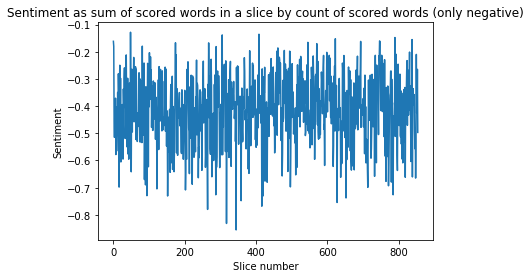

In [52]:
scores.plot()

In [53]:
MIN_NUMBER_OF_SENTENCES = 5000

In [64]:
long_books = {}

for book_description, book in books.items():
    book_summary_scores = book_analysis.BookAnalysis(book)
    book_summary_scores.score(scored_input_words_df)
    
    number_of_sentences = book_summary_scores.number_of_sentences
    print('author: {}, title: {}, number of sentences: {}'.format(book_summary_scores.book.author, book_summary_scores.book.title, book_summary_scores.number_of_sentences))
    
    if number_of_sentences >= MIN_NUMBER_OF_SENTENCES:
        long_books.update({book_description: book})

author: Alexander Fraser (1829-1908), title: kate_vernon_a_tale_vol_1, number of sentences: 1817


author: Alexander Fraser (1829-1908), title: kate_vernon_a_tale_vol_2, number of sentences: 2070


author: Catherine Amy Dawson Scott (1865-1934), title: wastralls_a_novel, number of sentences: 6000


author: Charles Garvice (1850-1920), title: only_a_girls_love, number of sentences: 11892


author: Alice Perrin (1867-1934), title: star_of_india, number of sentences: 4430


In [66]:
for description, long_book in long_books.items():
    print(description)

c_a_dawson_scott_wastralls_a_novel
charles_garvice_only_a_girls_love


In [67]:
results_path = '{}/outputs_21_11'.format(project_path)

In [68]:
#for step in range(0, 4):
#    for book in books.values():
#        scores = distance_analysis.DistanceToWordWithModuloSentimentHigherThan(book, step)
#        books_scores = scores.score(SLICE_SIZE, scored_input_words_df)
#        scores.store_to_file(results_path)
    

In [69]:
analysis = [
            #slice_analysis.SumScoredByScoredCountOnlyPositiveAnalysis, 
            #slice_analysis.SumScoredByAllCountOnlyPositiveAnalysis, 
            #slice_analysis.SumScoredOnlyPositiveAnalysis,
            #slice_analysis.SumScoredByScoredCountOnlyNegativeAnalysis, 
            #slice_analysis.SumScoredByAllCountOnlyNegativeAnalysis, 
            #slice_analysis.SumScoredOnlyNegativeAnalysis,
            #sentence_analysis.SumScoredByScoredCountOnlyPositivePerSentenceAnalysis,
            #sentence_analysis.SumScoredByAllCountOnlyPositivePerSentenceAnalysis,
            #sentence_analysis.SumScoredOnlyPositivePerSentenceAnalysis,
            #sentence_analysis.SumScoredByScoredCountOnlyNegativePerSentenceAnalysis,
            #sentence_analysis.SumScoredByAllCountOnlyNegativePerSentenceAnalysis,
            #sentence_analysis.SumScoredOnlyNegativePerSentenceAnalysis,
            sentence_analysis.NumberOfWordsWithSentimentPerSentenceAnalysis,
            sentence_analysis.NumberOfWordsPerSentenceAnalysis,
            #slice_analysis.SumScoredByScoredCountAnalysis,
            #slice_analysis.SumScoredByAllCountAnalysis,
            #slice_analysis.SumScoredAnalysis,
            sentence_analysis.SumScoredByScoredCountPerSentenceAnalysis,
            sentence_analysis.SumScoredByAllCountPerSentenceAnalysis,
            sentence_analysis.SumScoredPerSentenceAnalysis
            ]

In [70]:
for long_book in long_books.values():
    for task in analysis:
        scores = task(long_book)
        books_scores = scores.score(SLICE_SIZE, scored_input_words_df)
        scores.store_to_file(results_path, with_header=True, with_slice_number=False)
        ##scores.plot()
        

In [71]:
for long_book in long_books.values():
    book_summary_scores = book_analysis.BookAnalysis(long_book)
    book_summary_scores.score(scored_input_words_df)
    #book_summary_scores.print()
    book_summary_scores.store_to_file(results_path, with_header=True)